In [ ]:
#import packages
import numpy as np
from numpy import linalg as LA
import math as m
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio



In [3]:
n = 5
m = 3

# Generate random matrix X of shape (n, m)
X = np.random.rand(n, m)


In [4]:

# SVD of X with full matrices
U, S, VT = np.linalg.svd(X, full_matrices=True)
print("Full SVD:")
print("U matrix:\n", U)
print("S values:\n", S)
print("VT matrix:\n", VT)  # Note: VT is the transpose of V

# Economy SVD of X
Uec, Sec, VTec = np.linalg.svd(X, full_matrices=False)
print("\nEconomy SVD:")
print("U matrix:\n", Uec)
print("S values:\n", Sec)
print("VT matrix:\n", VTec)


Full SVD:
U matrix:
 [[-0.33458785  0.17141602  0.89507993  0.23353272  0.05442337]
 [-0.61001376 -0.03059648 -0.06325551 -0.45953515 -0.64169561]
 [-0.28193513 -0.8242789   0.0774892  -0.1989427   0.44214715]
 [-0.37204334 -0.2083642  -0.30317188  0.82845697 -0.19978481]
 [-0.54592172  0.49681894 -0.31130835 -0.09149189  0.59148691]]
S values:
 [2.37277617 0.80958088 0.40008509]
VT matrix:
 [[-0.56305883 -0.50243868 -0.65614033]
 [ 0.44120908  0.48857763 -0.75274594]
 [-0.69878416  0.71333532  0.05341744]]

Economy SVD:
U matrix:
 [[-0.33458785  0.17141602  0.89507993]
 [-0.61001376 -0.03059648 -0.06325551]
 [-0.28193513 -0.8242789   0.0774892 ]
 [-0.37204334 -0.2083642  -0.30317188]
 [-0.54592172  0.49681894 -0.31130835]]
S values:
 [2.37277617 0.80958088 0.40008509]
VT matrix:
 [[-0.56305883 -0.50243868 -0.65614033]
 [ 0.44120908  0.48857763 -0.75274594]
 [-0.69878416  0.71333532  0.05341744]]


In [ ]:

# Check results: X_ij = U_ik * S_kl * VT_lj

# Slow alternative for constructing diagonal matrix from S values
#S_matrix = np.zeros((n, m))
#for i in range(m):
#    S_matrix[i, i] = S[i]
# Fast alternative
S_matrix = np.zeros((n, m))
S_matrix[:m, :m] = np.diag(S)

print(S_matrix,' SS') 
# Compute X_ij = U_ik * S_kl * VT_lj, alternative 1 (slow)
res = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        for k in range(np.size(U, 1)):
            for l in range(np.size(S_matrix, 1)):
                res[i, j] += U[i, k] * S_matrix[k, l] * VT[l, j]

# Alternative 2: Compute X_ij using matrix multiplication
print("\nComparison using matrix multiplication:")
print("Difference 1 (manual computation):", X - res)
print("Difference 2 (matrix multiplication):", X - U @ S_matrix @ VT)

# Alternative 3: Compute X_ij using einsum
result_einsum = np.einsum('ik,kl,lj', U, S_matrix, VT)
print("\nComparison using einsum:")
print("Difference 3:", X - result_einsum)



In [6]:
#truncation with r terms
n=10; m=7
X=np.random.rand(n,m)
#economy SVD of X
Uec, Sec, VTec=np.linalg.svd(X,full_matrices=False)

r=5

#Slow alternative:
#Uapprox=np.zeros((n,r))
#for i in range(n):
#    for j in range(r):
#        Uapprox[i,j]=Uec[i,j]
# or faster alternative
Uapprox=Uec[:,:r]
#print('Ua=',Uapprox)

#Slow alternative
#Xapprox=np.zeros((n,m))
#Si ui*viT where ui is column i in U and vi is row i in VT
#for i in range(r):
#    Xapprox=Xapprox1+Sec[i]*np.einsum('k,l',Uapprox[:,i],VTec[i,:])

# faster alternative
Shat_matrix=np.diag(Sec)
Xapprox = Uec[:,0:r] @ Shat_matrix[0:r,0:r] @ VTec[0:r,:]

print('difference= ',Xapprox-X)
print('L2 difference: ',np.linalg.norm(X-Xapprox,2))




difference=  [[ 0.00095948  0.02760019  0.0101861   0.01598148 -0.0263899  -0.03180108
   0.02249005]
 [ 0.05675488 -0.0887342  -0.04020215  0.00091918  0.06060059  0.02228401
  -0.04254133]
 [-0.15288878  0.13288955  0.06866433 -0.0607136  -0.06325156  0.05734237
   0.02994151]
 [ 0.0349206  -0.14750606 -0.05942713 -0.05040913  0.12481317  0.11644565
  -0.10027565]
 [ 0.01619577 -0.00322651 -0.00322219  0.01238476 -0.00352173 -0.0180726
   0.00548233]
 [ 0.02546369 -0.07963131 -0.0329054  -0.02143478  0.06470194  0.05402886
  -0.05084527]
 [ 0.12933246 -0.12863341 -0.06414081  0.04246068  0.06878526 -0.03057333
  -0.03826374]
 [-0.03828143  0.06648171  0.02959214  0.00301762 -0.04712136 -0.02236192
   0.03398222]
 [ 0.0700144   0.04082032  0.00652044  0.08358823 -0.06682002 -0.13868852
   0.06738135]
 [-0.20441008  0.19031882  0.09652563 -0.07423417 -0.09648112  0.06268097
   0.05011844]]
L2 difference:  0.524621600286463


In [7]:
# Read the screenshot image
plt.rcParams['figure.figsize'] = [16, 8]  # Set plot figure size
filename = 'DATA/me.jpg'  # File path of the image
A = imread(filename)  # Read the image

# Convert RGB to grayscale
X = np.mean(A, -1)  # Compute the grayscale image by taking the mean across color channels
print(np.size(X,0))
print(np.size(X,1))
print(np.max(X))
print(np.min(X))



1189
818
255.0
0.0


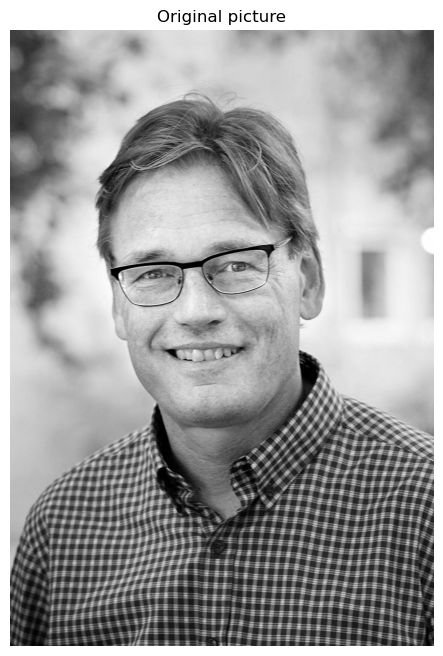

In [8]:
# Read screen shot of compressible/incompressible flows:
plt.rcParams['figure.figsize'] = [16, 8]
filename='DATA/me.jpg'
A = imread(filename)

# Convert RGB to grayscale:
X = np.mean(A, -1); 
# Display the original image
img = plt.imshow(X)  # Display the grayscale image
img.set_cmap('gray')  # Set colormap to grayscale
plt.axis('off')  # Turn off axis labels
plt.title('Original picture')  # Set the title
plt.show()  # Show the plot

In [ ]:
# Perform economy SVD on the grayscale image
U, S, VT = np.linalg.svd(X, full_matrices=False)  # Compute the economy SVD matrices
S = np.diag(S)  # Construct a diagonal matrix from the singular values

# Construct approximate images for different ranks
j = 0
r_vector = [5, 50, 200]  # Different ranks for approximation
rel_no_stored_values = np.zeros(len(r_vector))
rel_error_values = np.zeros(len(r_vector))

for r in r_vector:
    # Compute the approximation using SVD
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    
    # Compute relative number of stored values and relative error
    rel_no_stored_values[j] = (r + np.size(U, 0) * r + np.size(VT, 0) * r) / (np.size(X, 0) * np.size(X, 1))
    rel_error_values[j] = np.linalg.norm(Xapprox - X, 2) / np.linalg.norm(X, 2)
    
    # Display the approximate image
    plt.figure(j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    value1 = '{:.2e}'.format(rel_no_stored_values[j])
    value2 = '{:.2e}'.format(rel_error_values[j])
    plt.title('r = ' + str(r) + ', Rel no of stored values = ' + str(value1) + ' Relative error: ' + str(value2))
    j += 1
    plt.show()

In [ ]:
plt.plot(r_vector, rel_error_values)
plt.xlabel('Number of terms')
plt.ylabel('Relative norm 2 error')
plt.show()            
plt.plot(r_vector, rel_no_stored_values)
plt.xlabel('Number of terms')
plt.ylabel('Relative number of stored values')
plt.show()  


## For plotting of singular values and their cumulative sum:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

### Example of information in SVD matrices

In [10]:
# Define the clamped beam displacement function
def w_clamped_beam(x, q0, L, Emod, I):
    return q0 * x**2 * (10 * L**2 * (2 * L - x) + x**3) / (120 * Emod * I * L)

# Define constants and parameters
L = 1000
Emod = 210 * 10**3
I = 20**4 / 12
x = np.linspace(0, L, 100)  # Spatial positions
time = np.linspace(0, np.pi * 2., 10)  # Time values
q0 = 1. * np.sin(time)  # Time-dependent load

print("Number of time steps:", len(q0))

X = np.zeros((len(x), len(time)))  # Create a matrix to store the data

# Fill the data matrix using the clamped beam function
for i in range(len(x)):
    for j in range(len(q0)):
        X[i, j] = w_clamped_beam(x[i], q0[j], L, Emod, I)

# Perform economy SVD on the data matrix
Uhat, Shat, VhatT = np.linalg.svd(X, full_matrices=False)

print("Singular values:", Shat)


Number of time steps: 10
Singular values: [3.50329171e+02 3.94819266e-14 1.40686783e-14 1.19977237e-14
 1.00196592e-14 8.81895442e-15 6.56547428e-15 4.75927626e-15
 2.87191681e-30 0.00000000e+00]


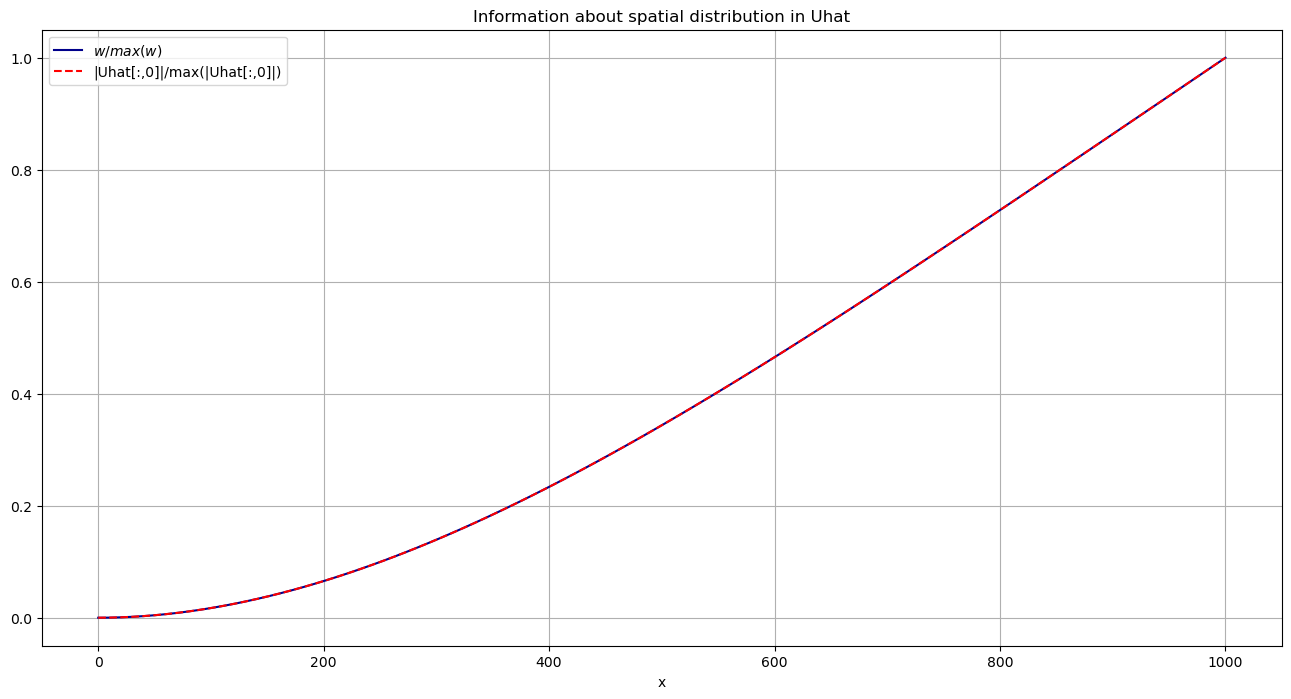

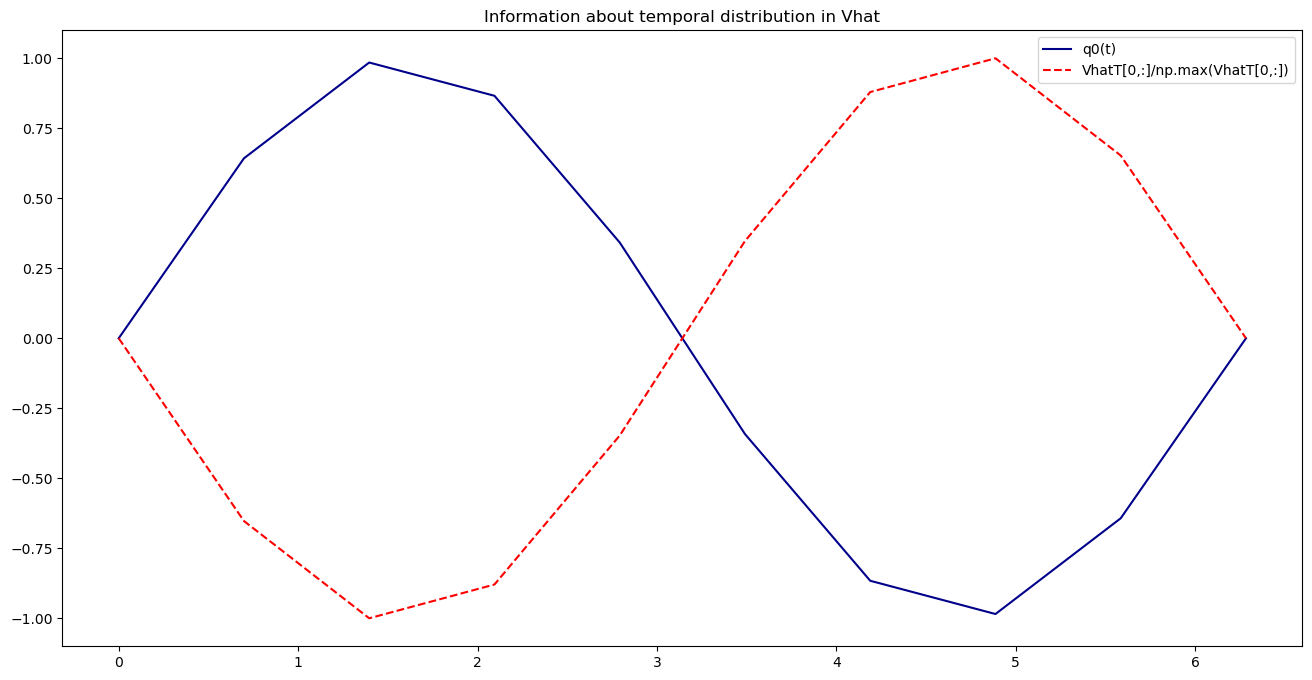

In [11]:
# Create a figure for spatial distribution visualization
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel('x', fontsize=10)
ax.set_title('Information about spatial distribution in Uhat')
ax.grid(visible=True)

# Plot the spatial distribution of the data and the first singular vector
ax.plot(x, X[:, 1] / np.max(X[:, 1]), label='$w/max(w)$', linestyle='-', color='darkblue')
ax.plot(x, np.abs(Uhat[:, 0]) / np.max(np.abs(Uhat[:, 0])), label='|Uhat[:,0]|/max(|Uhat[:,0]|)', linestyle='--', color='red')
ax.legend(loc='best')

# Create a figure for temporal distribution visualization
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(time, q0, label='q0(t)', linestyle='-', color='darkblue')
ax.plot(time, VhatT[0, :] / np.max(VhatT[0, :]), label='VhatT[0,:]/np.max(VhatT[0,:])', linestyle='--', color='red')
ax.set_title('Information about temporal distribution in Vhat')
ax.legend(loc='best')

# Show the plots
plt.show()

## For overdetermined systems:
Show with a numerical example that result from pseudo-inverse gives lowest value of $||A \,x-b||_2$ 

In [ ]:
# overdetermined system, more equations than unknowns, more rows than columns
b=np.array([1.,1.5,2])
A=np.array([[1.,2.],[1.1,2.1],[1.2,2.2]])

#find x that minimizes
def obj_fcn(x):
    return np.linalg.norm(A@x-b,2)


x0=np.array([6.,2.])
print('start',obj_fcn(x0))

#use nonlinear optimization (more details next week ...)
from scipy.optimize import minimize
res = minimize(obj_fcn, x0, method='nelder-mead',
               options={'xatol': 1e-6, 'disp': True})

print(res.x,obj_fcn(res.x))

#result from pseudo inverse:
xtilde=np.linalg.pinv(A) @ b
print('xtilde=',xtilde)

print('difference=',res.x-xtilde)


## For underdetermined systems:
Show with a numerical example that result from pseudo-inverse gives lowest value of $||x||_2$ that fulfills $Ax=b$ 

In [ ]:
# underdetermined system, less equations than unknowns, less rows than columns
b=np.array([1.,1.5])
A=np.array([[1.,2.,3.],[1.1,2.1,3.1]])


#find x that minimizes
def obj_fcn(x):
    return np.linalg.norm(x,2)
x0=np.array([6.,2.,3.])
print('start',obj_fcn(x0))

#use nonlinear optimization 
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(A, b, b)
from scipy.optimize import minimize
res = minimize(obj_fcn, x0, method='trust-constr', constraints=[linear_constraint],
               options={'verbose': 1})
print(res.x,obj_fcn(res.x))

#result from pseudo inverse:
xtilde=np.linalg.pinv(A) @ b
print('xtilde=',xtilde)

print('difference=',res.x-xtilde)

### Example linear regression

A line is given as $b=x \, a$ where $x$ is the slope. If some random noise is added to  $b$ in some points. Solve for the best slope that fits this disturbed data. 

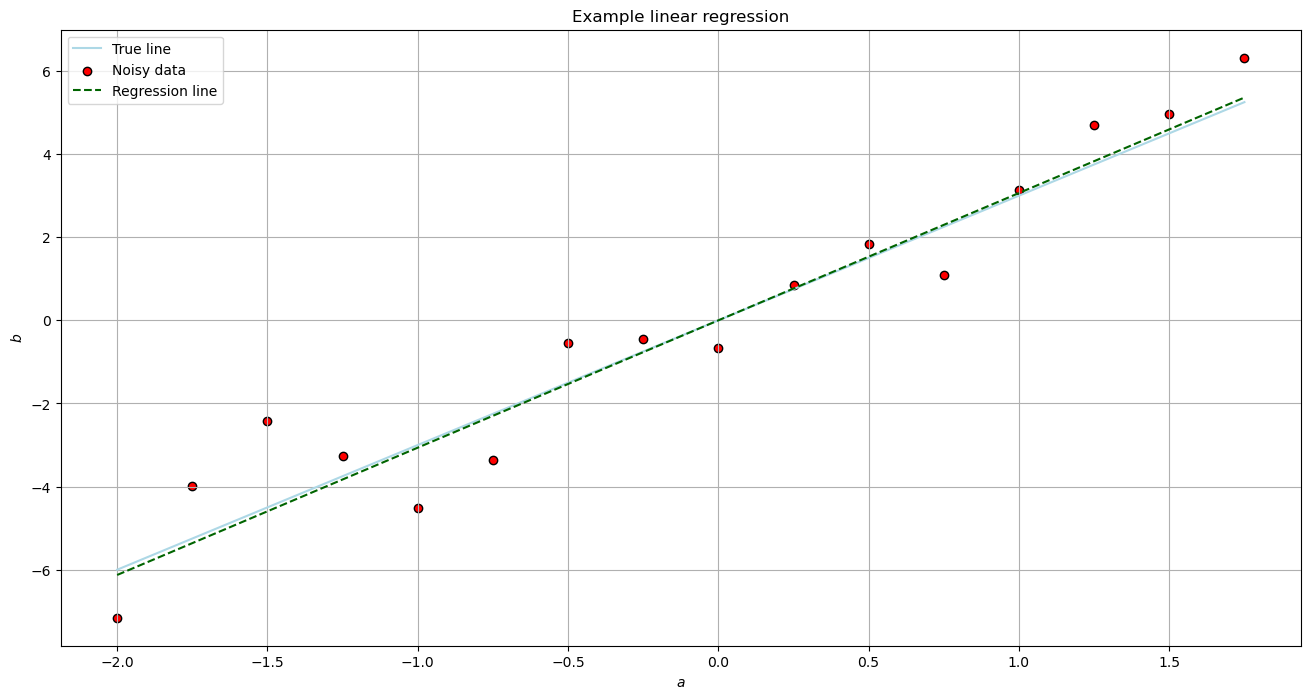

In [9]:
x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1) #changes to a column from a row
b = x*a + np.random.randn(np.size(a,0),np.size(a,1)) # Add noise to data, normal (Gaussian) distribution with mean 0 and variance 1
U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit
#alternative: xtilde2 = np.linalg.pinv(a) @ b


# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'$a$')    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_ylabel(r'$b$')
ax.set_title('Example linear regression')
# Background grid
ax.grid(visible=True)

# plot 
ax.plot(a, x*a, label='True line', linestyle='-', color='lightblue')
ax.scatter(a, b, label='Noisy data', marker='o', facecolors='red', edgecolors='black')
ax.plot(a, xtilde*a, label='Regression line', linestyle='--', color='darkgreen')
ax.legend(loc='best')


### PCA


In [ ]:
#create artificial test datas
xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'$x_1$')    
ax.set_ylabel(r'$x_2$')
ax.set_title('Test data')
# Background grid
ax.grid(visible=True)

# plot 
ax.scatter(X[0,:], X[1,:], label='Noisy data', marker='o', facecolors='red', edgecolors='black')


In [ ]:
#X contains columns of snapshots
print('no rows = ',np.size(X,0),'no columns = ',np.size(X,1)) 
nPoints=np.size(X,1)
#compute mean of all snapshots (columns)
Xavg =np.zeros(np.size(X,0))
for i in range(nPoints):
    Xavg=Xavg+X[:,i]
Xavg=Xavg/nPoints

print(Xavg)

#mean subtract data, now follow the book that snapshots should have been in rows
B=np.zeros((np.size(X,1),np.size(X,0)))
for i in range(np.size(B,0)):
    for j in range(np.size(B,1)):
        B[i,j]=X[j,i]-Xavg[j]

#Covariance matrix
C=B.T @ B/(np.size(B,0)-1)

#compute eigenvectors of C
la, n=np.linalg.eig(C)
print(C)
print('eigenvalues',la)
print('eigenvector 1',n[:,0])
print('eigenvector 2',n[:,1])


#alternative use SVD
import math as m
Uec, Sec, VTec=np.linalg.svd(B,full_matrices=False)
print('First column in Vec: ',VTec[0,:])
print('Second column in Vec: ',VTec[1,:])
print('Singular values: ',Sec)


#Principal components can now be ontained from projecting snapshots in base vectors
T=np.zeros((nPoints,2))
for i in range(nPoints):
    T[i,:]=B[i,:]@VTec.T

#Now we can plot th data in the new coordinate system
# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Add Labels to the Axis
ax.set_xlabel(r'principle component direction 1')    
ax.set_ylabel(r'$x_2$')
ax.set_title('principle component direction 2')
# Background grid
ax.grid(visible=True)
# Background grid
ax.grid(visible=True)
# plot 
ax.scatter(T[:,0], T[:,1], label='Noisy data', marker='o', facecolors='blue', edgecolors='black')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})


obs = np.loadtxt(os.path.join('DATA','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()